In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

/tmp/ipykernel_56402/640806056.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [6]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df = pd.concat([df1,df2])
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]

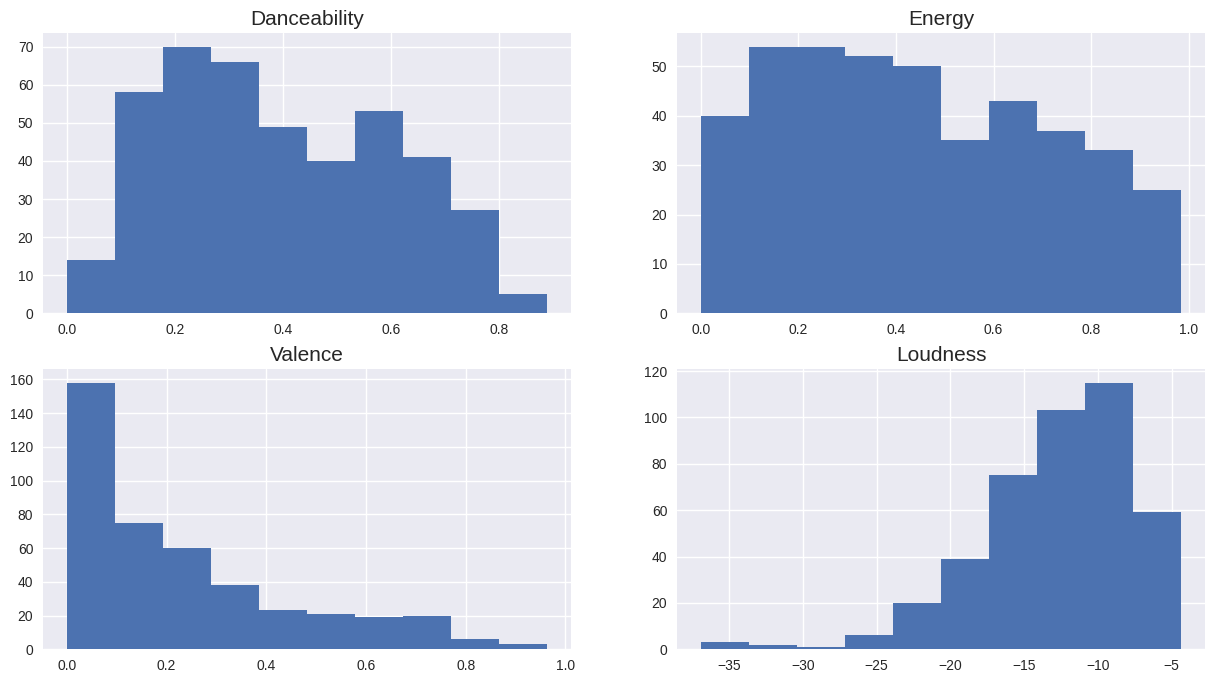

In [7]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [8]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,423.000000,423.000000,423.000000,423.000000,423.000000
mean,32.628842,0.395588,0.446771,0.236248,-12.805064
std,17.830344,0.203246,0.267740,0.221957,5.176817
min,0.000000,0.000000,0.000791,0.000000,-36.892000
25%,17.000000,0.228000,0.210000,0.047200,-15.899500
50%,33.000000,0.358000,0.420000,0.157000,-11.826000
75%,47.000000,0.563500,0.664500,0.345000,-8.801500
max,82.000000,0.890000,0.985000,0.964000,-4.345000


In [9]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [10]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

/home/nikhil/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

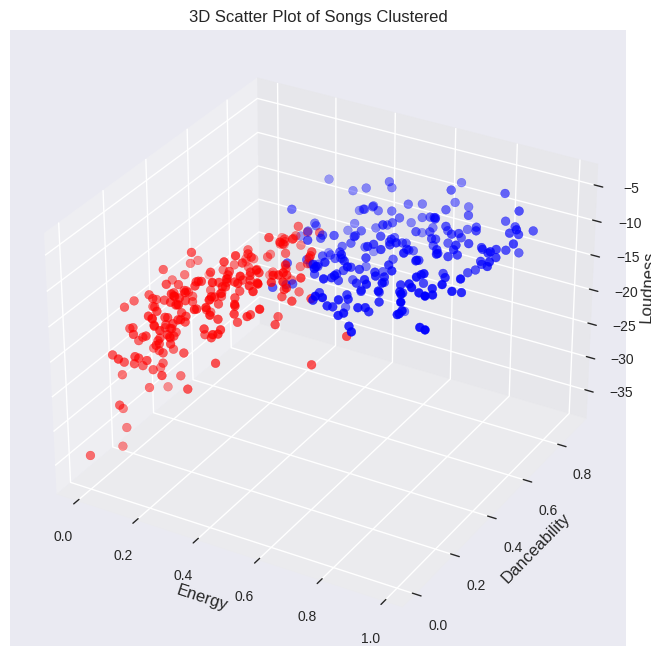

In [12]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")



In [33]:
df.groupby(['kmeans']).mean()


TypeError: Could not convert (Nice Dream)15 Step2 + 2 = 5A Brain in a BottleA Punch Up At a WeddingA Wolf At the DoorAirbagAirbag - RemasteredAmokAnalyseAnalyse (Various Remix)And It Rained All NightAnd It Rained All Night (Burial Remix)Anyone Can Play GuitarAtoms For Peace (Four Tet Remix)BackdriftsBangers + MashBefore Your Very Eyes...Black StarBlack SwanBlack Swan (Cristian Vogel Spare Parts Remix)Black Swan (Vogel Bonus Beat Eraser Remix)BloomBloom (Blawan Rmx)Bloom (Harmonic 313 Rmx)Bloom (Mark Pritchard Rmx)Bloom (Objekt RMX)Blow OutBodysnatchersBonesBurn the WitchClimbing Up the WallsClimbing Up the Walls - RemasteredCodex (Illum Sphere)CreepCymbal Rush (The Field Late Night Essen Und Trinken Remix)DefaultDollars & CentsDollars & Cents (Live)Down Is The New UpDroppedElectioneeringElectioneering - RemasteredFeelingPulledApartByHorsesFeralFeral (Lone RMX)Ful StopGive Up The Ghost (Brokenchord Rmx)Give Up The Ghost (Thriller Houseghost Remix)Go To SleepGood Evening Mrs Magpie (Modeselektor RMX)Harrowdown HillHarrowdown Hill (Extended Mix)Harrowdown Hill (The Bug Remix)Hearing DamageHigh And DryHouse Of CardsHow Do You?I Can'tI Might Be WrongI Might Be Wrong (Live)I PromiseIdentikitIdiotequeIdioteque (Live In Oxford)IluvyaImpossible KnotsJigsaw Falling Into PlaceJudge Jury and ExecutionerJustKarma PoliceKarma Police - RemasteredKid AKnives OutLet DownLet Down - RemasteredLiftLittle By LittleLittle By Little (Caribou Rmx)Little By Little (Shed)Lotus FlowerLotus Flower (Jacques Greene Rmx)Lotus Flower (SBTRKT RMX)LurgeeMagic BeanzMeeting in the Aisle - RemasteredMorning Bell (Live In Oxford)Morning Mr MagpieMorning Mr Magpie (Nathan Fake Rmx)My Iron LungMyxomatosisNose Grows SomeNot The NewsNot The News - Clark RemixNot The News - Equiknoxx Remix Feat. Time Cow & GavsborgNot The News - Extendo MixNot The News - Mark Pritchard RemixOptimisticPalo Alto - RemasteredParanoid AndroidParanoid Android - RemasteredPearly* - RemasteredPlanet TelexProve YourselfPulk/Pull Revolving DoorsReckonerReverse RunningRipcordRunwayawayS.A.D.ScatterbrainSeparatorSeparator (Anstam RMX)Separator (Four Tet RMX)Sit Down. Stand UpSkip Divided (Modeselektor Remix)StaircaseStop WhisperingStreet Spirit (Fade Out)Stuck Together PiecesSubterranean Homesick AlienSubterranean Homesick Alien - RemasteredSulkThe AxeThe BendsThe ButcherThe ClockThe Clock (Surgeon Remix)The Drunkk MachineThe GloamingThe National AnthemThe National Anthem (Live in France)TheHollowEarthThere Is No Ice (For My Drink)There, ThereTrafficUnlessUp On The LadderVegetableVoiceless TerrorWhat the Eyeballs DidWhere I End and You BeginYou24 Hour CharlestonA Simple LifeAround AgainAround Again (The Acid Remix)Around Again - The Acid RemixBankstersBeyond ReasonBring Me Coffee Or Tea - 2011 RemasteredComing Up for AirComing up for AirConvergenceDark StreetsDark Streets (Reprise)Dark Streets - RepriseDeep DaysDon't Turn The Light On, Leave Me Alone (from Cream)DownstairsGhostsGreenwood: 48 Responses to Polymorphia: Pacay TreeGreenwood: Popcorn Superhet Receiver:, Pt. 2 BHammer and TapeIt Will End in TearsLet It GoMilky Drops from HeavenNauseaNudnik HeadacheOlympikOlympik - Spike Stent EditProven LandsRunning BlindShangri-LaShangri-La - Spike Stent EditSplitterTurning It Inside OutWalkWhat Goes AroundAll I NeedAtoms For PeaceBloom (Jamie xx Rework)Cymbal RushDecks DarkEverything In Its Right Place (Live In France)Fitter HappierFitter Happier - RemasteredGuess Again!Has EndedI Am a Very Rude PersonIll WindIn LimboIngenueJetstreamLast FlowersLast I Heard (...He Was Circling the Drain)Like Spinning PlatesLull - RemasteredMorning BellOpen AgainPackt Like Sardines In a Crushed Tin BoxPresent TenseSkip DividedThe EraserThe Mother LodeThinking About YouTwistVolk Spin Off v3Weird Fishes/ ArpeggiWaiting for a Sign to numeric

In [14]:
cluster_0 = df[df['kmeans']==0]
cluster_1  = df[df['kmeans']==1]

In [15]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)